<a href="https://colab.research.google.com/github/rezamahrez/BangkitAcademy/blob/master/Copy_of_bankgkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q git+https://github.com/tensorflow/docs

In [0]:
%tensorflow_version 2.x

In [0]:
from datetime import datetime,date
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/JKM (1).txt',sep="|")
data

,ID_AGE,ID_TK,KODE_KANTOR,TGL_LAHIR,TGL_KEPESERTAAN,JENIS_KELAMIN,KODE_KLAIM,KET_KLAIM,TGL_AGENDA,TGL_PENETAPAN,TGL_BAYAR,TGL_KEMATIAN,STATUS_AGENDA,STATUS_PENETAPAN,KET_STATUS_AGENDA,X_RINCIAN_MNFT,X_BIAYA_DISETUJUI
0,AGE10573,TK1,B00,05/10/1971,01/08/2011,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,15/12/2015,15/12/2015,15/12/2015,NaN,SELESAI,SELESAI,SELESAI,SANTUNAN BERKALA,4800000.0
1,AGE10573,TK1,B00,05/10/1971,01/08/2011,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,15/12/2015,15/12/2015,15/12/2015,NaN,SELESAI,SELESAI,SELESAI,BIAYA PEMAKAMAN,3000000.0
2,AGE10573,TK1,B00,05/10/1971,01/08/2011,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,15/12/2015,15/12/2015,15/12/2015,NaN,SELESAI,SELESAI,SELESAI,SANTUNAN KEMATIAN,16200000.0
3,AGE10573,TK1,B00,05/10/1971,01/08/2011,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,15/12/2015,15/12/2015,15/12/2015,NaN,SELESAI,SELESAI,SELESAI,BEASISWA PENDIDIKAN,0.0
4,AGE12993,TK5,J00,05/06/1955,01/07/2011,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,23/12/2015,23/12/2015,28/12/2015,NaN,SELESAI,SELESAI,SELESAI,SANTUNAN KEMATIAN,16200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14843,AGE11585,TK14785,N02,NaN,NaN,NaN,2,JKM JAKON,18/12/2015,18/12/2015,18/12/2015,NaN,SELESAI,SELESAI,SELESAI,BEASISWA PENDIDIKAN,0.0
14844,AGE12357,TK14785,N00,NaN,NaN,NaN,2,JKM JAKON,21/12/2015,21/12/2015,22/12/2015,NaN,SELESAI,SELESAI,SELESAI,BEASISWA PENDIDIKAN,0.0
14845,AGE12357,TK14785,N00,NaN,NaN,NaN,2,JKM JAKON,21/12/2015,21/12/2015,22/12/2015,NaN,SELESAI,SELESAI,SELESAI,BIAYA PEMAKAMAN,3000000.0
14846,AGE12357,TK14785,N00,NaN,NaN,NaN,2,JKM JAKON,21/12/2015,21/12/2015,22/12/2015,NaN,SELESAI,SELESAI,SELESAI,SANTUNAN BERKALA,4800000.0


In [0]:
data.isnull().sum()

ID_AGE                   0
ID_TK                    0
KODE_KANTOR              0
TGL_LAHIR               96
TGL_KEPESERTAAN         72
JENIS_KELAMIN           76
KODE_KLAIM               0
KET_KLAIM                0
TGL_AGENDA               0
TGL_PENETAPAN           36
TGL_BAYAR              867
TGL_KEMATIAN         14083
STATUS_AGENDA            0
STATUS_PENETAPAN         0
KET_STATUS_AGENDA        0
X_RINCIAN_MNFT           0
X_BIAYA_DISETUJUI       18
dtype: int64

In [0]:
#remove nan value
data = data.drop(columns=['TGL_KEMATIAN','TGL_BAYAR','ID_AGE','ID_TK','KODE_KANTOR']) #remove column TGL_KEMATIAN
data = data.dropna() #remove row nan value (because dont have so many NaN value in column)
data

,TGL_LAHIR,TGL_KEPESERTAAN,JENIS_KELAMIN,KODE_KLAIM,KET_KLAIM,TGL_AGENDA,TGL_PENETAPAN,STATUS_AGENDA,STATUS_PENETAPAN,KET_STATUS_AGENDA,X_RINCIAN_MNFT,X_BIAYA_DISETUJUI
0,05/10/1971,01/08/2011,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,15/12/2015,15/12/2015,SELESAI,SELESAI,SELESAI,SANTUNAN BERKALA,4800000.0
1,05/10/1971,01/08/2011,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,15/12/2015,15/12/2015,SELESAI,SELESAI,SELESAI,BIAYA PEMAKAMAN,3000000.0
2,05/10/1971,01/08/2011,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,15/12/2015,15/12/2015,SELESAI,SELESAI,SELESAI,SANTUNAN KEMATIAN,16200000.0
3,05/10/1971,01/08/2011,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,15/12/2015,15/12/2015,SELESAI,SELESAI,SELESAI,BEASISWA PENDIDIKAN,0.0
4,05/06/1955,01/07/2011,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,23/12/2015,23/12/2015,SELESAI,SELESAI,SELESAI,SANTUNAN KEMATIAN,16200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14779,19/03/1984,01/09/2011,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,01/12/2015,01/12/2015,SELESAI,SELESAI,SELESAI,BEASISWA PENDIDIKAN,0.0
14780,23/10/1978,01/07/2011,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,22/12/2015,22/12/2015,SELESAI,SELESAI,SELESAI,BEASISWA PENDIDIKAN,0.0
14781,23/10/1978,01/07/2011,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,22/12/2015,22/12/2015,SELESAI,SELESAI,SELESAI,SANTUNAN KEMATIAN,16200000.0
14782,23/10/1978,01/07/2011,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,22/12/2015,22/12/2015,SELESAI,SELESAI,SELESAI,SANTUNAN BERKALA,4800000.0


In [0]:
data['JENIS_KELAMIN'].unique()
data['JENIS_KELAMIN'].value_counts()

L    11993
P     2713
Name: JENIS_KELAMIN, dtype: int64

In [0]:
data['KODE_KLAIM'].unique()
data['KODE_KLAIM'].value_counts()

B      11842
B2      1363
JKM      841
B1       660
Name: KODE_KLAIM, dtype: int64

In [0]:
data['KET_KLAIM'].unique()
data['KET_KLAIM'].value_counts()

MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF                               11842
MENINGGAL DUNIA DALAM MASA PERLINDUNGAN 6 BULAN, JHT SUDAH DI BAYARKAN     1363
JKM                                                                         841
MENINGGAL DUNIA DALAM MASA PERLINDUNGAN 6 BULAN                             660
Name: KET_KLAIM, dtype: int64

In [0]:
data['STATUS_AGENDA'].unique()
data['STATUS_AGENDA'].value_counts()

SELESAI      13893
BATAL          767
PENETAPAN       25
DISETUJUI       21
Name: STATUS_AGENDA, dtype: int64

In [0]:
data['KET_STATUS_AGENDA'].unique()
data['KET_STATUS_AGENDA'].value_counts()

SELESAI      13893
BATAL          767
PENETAPAN       25
DISETUJUI       21
Name: KET_STATUS_AGENDA, dtype: int64

In [0]:
data['X_RINCIAN_MNFT'].unique()
data['X_RINCIAN_MNFT'].value_counts()

SANTUNAN KEMATIAN      3795
BIAYA PEMAKAMAN        3794
SANTUNAN BERKALA       3793
BEASISWA PENDIDIKAN    3324
Name: X_RINCIAN_MNFT, dtype: int64

In [0]:
#crate function to calculate duration
def calculate_duration(inputDate):
    inputDate = datetime.strptime(inputDate, "%d/%m/%Y").date()
    today = date.today()
    return today.year - inputDate.year - ((today.month, today.day) < (inputDate.month, inputDate.day))

In [0]:
#convert variable has date format to duration
data['TGL_LAHIR'] = data['TGL_LAHIR'].apply(calculate_duration)
data = data.rename(columns={'TGL_LAHIR': 'UMUR'})
data['TGL_KEPESERTAAN'] = data['TGL_KEPESERTAAN'].apply(calculate_duration)
data = data.rename(columns={'TGL_KEPESERTAAN': 'LAMA_KEPESERTAAN'})
data['TGL_PENETAPAN'] = data['TGL_PENETAPAN'].apply(calculate_duration)
data = data.rename(columns={'TGL_PENETAPAN': 'LAMA_PENETAPAN'})
data['TGL_AGENDA'] = data['TGL_AGENDA'].apply(calculate_duration)
data = data.rename(columns={'TGL_AGENDA': 'LAMA_AGENDA'})

In [0]:
data

,UMUR,LAMA_KEPESERTAAN,JENIS_KELAMIN,KODE_KLAIM,KET_KLAIM,LAMA_AGENDA,LAMA_PENETAPAN,STATUS_AGENDA,STATUS_PENETAPAN,KET_STATUS_AGENDA,X_RINCIAN_MNFT,X_BIAYA_DISETUJUI
0,48,8,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,4,4,SELESAI,SELESAI,SELESAI,SANTUNAN BERKALA,4800000.0
1,48,8,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,4,4,SELESAI,SELESAI,SELESAI,BIAYA PEMAKAMAN,3000000.0
2,48,8,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,4,4,SELESAI,SELESAI,SELESAI,SANTUNAN KEMATIAN,16200000.0
3,48,8,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,4,4,SELESAI,SELESAI,SELESAI,BEASISWA PENDIDIKAN,0.0
4,64,8,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,4,4,SELESAI,SELESAI,SELESAI,SANTUNAN KEMATIAN,16200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14779,36,8,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,4,4,SELESAI,SELESAI,SELESAI,BEASISWA PENDIDIKAN,0.0
14780,41,8,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,4,4,SELESAI,SELESAI,SELESAI,BEASISWA PENDIDIKAN,0.0
14781,41,8,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,4,4,SELESAI,SELESAI,SELESAI,SANTUNAN KEMATIAN,16200000.0
14782,41,8,L,B,MENINGGAL DUNIA PADA SAAT KEPESERTAAN AKTIF,4,4,SELESAI,SELESAI,SELESAI,SANTUNAN BERKALA,4800000.0


In [0]:
# Instatniate LabelEncoder
le = LabelEncoder()
# LabelEncode Class column of df to change discrete to continues
data["KET_KLAIM"] = le.fit_transform(data["KET_KLAIM"])
data["KODE_KLAIM"] = le.fit_transform(data["KODE_KLAIM"])
data["STATUS_AGENDA"] = le.fit_transform(data["STATUS_AGENDA"])
data["STATUS_PENETAPAN"] = le.fit_transform(data["STATUS_PENETAPAN"])
data["KET_STATUS_AGENDA"] = le.fit_transform(data["KET_STATUS_AGENDA"])
data["X_RINCIAN_MNFT"] = le.fit_transform(data["X_RINCIAN_MNFT"])
data["JENIS_KELAMIN"] = le.fit_transform(data["JENIS_KELAMIN"])

In [0]:
data

,UMUR,LAMA_KEPESERTAAN,JENIS_KELAMIN,KODE_KLAIM,KET_KLAIM,LAMA_AGENDA,LAMA_PENETAPAN,STATUS_AGENDA,STATUS_PENETAPAN,KET_STATUS_AGENDA,X_RINCIAN_MNFT,X_BIAYA_DISETUJUI
0,48,8,0,0,3,4,4,3,3,3,2,4800000.0
1,48,8,0,0,3,4,4,3,3,3,1,3000000.0
2,48,8,0,0,3,4,4,3,3,3,3,16200000.0
3,48,8,0,0,3,4,4,3,3,3,0,0.0
4,64,8,0,0,3,4,4,3,3,3,3,16200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14779,36,8,0,0,3,4,4,3,3,3,0,0.0
14780,41,8,0,0,3,4,4,3,3,3,0,0.0
14781,41,8,0,0,3,4,4,3,3,3,3,16200000.0
14782,41,8,0,0,3,4,4,3,3,3,2,4800000.0


In [0]:
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)

In [0]:
test_dataset

In [0]:
#calculate decrictive statistic
train_stats = train_dataset.describe()
train_stats.pop("X_BIAYA_DISETUJUI")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
UMUR,11765.0,45.994305,17.464071,-30.0,40.0,50.0,57.0,70.0
LAMA_KEPESERTAAN,11765.0,14.106842,9.335016,4.0,7.0,10.0,20.0,42.0
JENIS_KELAMIN,11765.0,0.183255,0.386892,0.0,0.0,0.0,0.0,1.0
KODE_KLAIM,11765.0,0.404505,0.880962,0.0,0.0,0.0,0.0,3.0
KET_KLAIM,11765.0,2.643349,0.817892,0.0,3.0,3.0,3.0,3.0
LAMA_AGENDA,11765.0,4.089078,0.329942,4.0,4.0,4.0,4.0,6.0
LAMA_PENETAPAN,11765.0,4.088483,0.331002,3.0,4.0,4.0,4.0,6.0
STATUS_AGENDA,11765.0,2.834424,0.680611,0.0,3.0,3.0,3.0,3.0
STATUS_PENETAPAN,11765.0,2.834424,0.680611,0.0,3.0,3.0,3.0,3.0
KET_STATUS_AGENDA,11765.0,2.834424,0.680611,0.0,3.0,3.0,3.0,3.0


In [0]:
train_labels = train_dataset.pop('X_BIAYA_DISETUJUI')

In [0]:
train_labels

10266     4800000.0
4987            0.0
1538     16200000.0
6213     16200000.0
1097      3000000.0
            ...    
6126      2000000.0
10504    14200000.0
5444      3000000.0
6687     16200000.0
3568      3000000.0
Name: X_BIAYA_DISETUJUI, Length: 11765, dtype: float64

In [0]:
test_labels = test_dataset.pop('X_BIAYA_DISETUJUI')

In [0]:
test_labels

0         4800000.0
13        2000000.0
21        4800000.0
25        3000000.0
26       16200000.0
            ...    
14748    14200000.0
14749     4800000.0
14759    16200000.0
14762    14200000.0
14781    16200000.0
Name: X_BIAYA_DISETUJUI, Length: 2941, dtype: float64

In [0]:
#normalisasi datasets
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [0]:
normed_test_data

,UMUR,LAMA_KEPESERTAAN,JENIS_KELAMIN,KODE_KLAIM,KET_KLAIM,LAMA_AGENDA,LAMA_PENETAPAN,STATUS_AGENDA,STATUS_PENETAPAN,KET_STATUS_AGENDA,X_RINCIAN_MNFT
0,0.114847,-0.654187,-0.47366,-0.459163,0.436061,-0.26998,-0.267318,0.243275,0.243275,0.243275,0.406661
13,0.572930,-0.654187,-0.47366,-0.459163,0.436061,-0.26998,-0.267318,0.243275,0.243275,0.243275,-0.501189
21,1.031014,-0.654187,-0.47366,-0.459163,0.436061,-0.26998,-0.267318,0.243275,0.243275,0.243275,0.406661
25,-0.973101,-0.654187,-0.47366,-0.459163,0.436061,-0.26998,-0.267318,0.243275,0.243275,0.243275,-0.501189
26,-0.973101,-0.654187,-0.47366,-0.459163,0.436061,-0.26998,-0.267318,0.243275,0.243275,0.243275,1.314512
...,...,...,...,...,...,...,...,...,...,...,...
14748,0.401149,-0.654187,-0.47366,-0.459163,0.436061,-0.26998,-0.267318,0.243275,0.243275,0.243275,1.314512
14749,0.401149,-0.654187,-0.47366,-0.459163,0.436061,-0.26998,-0.267318,0.243275,0.243275,0.243275,0.406661
14759,-0.228716,-0.654187,-0.47366,-0.459163,0.436061,-0.26998,-0.267318,0.243275,0.243275,0.243275,1.314512
14762,0.630191,-0.654187,-0.47366,-0.459163,0.436061,-0.26998,-0.267318,0.243275,0.243275,0.243275,1.314512


In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [0]:
#test model prediction
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.19912153],
       [-0.5040983 ],
       [-0.59684986],
       [-0.75319827],
       [-0.33621415],
       [-0.5294621 ],
       [-0.38017356],
       [-0.38011166],
       [-0.25464454],
       [-0.08401012]], dtype=float32)

In [0]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:73393743331328.0000,  mae:5934545.0000,  mse:73577806168064.0000,  val_loss:72425773465600.0000,  val_mae:5905531.0000,  val_mse:72576273481728.0000,  
....................................................................................................
Epoch: 100, loss:7353214697472.0000,  mae:1357234.3750,  mse:7368856305664.0000,  val_loss:7606071984128.0000,  val_mae:1394628.7500,  val_mse:7639214325760.0000,  
....................................................................................................
Epoch: 200, loss:5608666300416.0000,  mae:584907.1250,  mse:5622864543744.0000,  val_loss:5921826668544.0000,  val_mae:610039.9375,  val_mse:5957306286080.0000,  
....................................................................................................
Epoch: 300, loss:5506449539072.0000,  mae:512679.5938,  mse:5520685531136.0000,  val_loss:5822772936704.0000,  val_mae:541088.0000,  val_mse:5858809348096.0000,  
......................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,5.438140e+12,395626.68750,5.453924e+12,5.805194e+12,425443.21875,5.841590e+12,995
996,5.435553e+12,396677.59375,5.451590e+12,5.802344e+12,423145.43750,5.838731e+12,996
997,5.432937e+12,398738.56250,5.448362e+12,5.799324e+12,424209.37500,5.835692e+12,997
998,1.040630e+13,395951.53125,5.445583e+12,5.805815e+12,423187.06250,5.842219e+12,998
999,5.434782e+12,394775.25000,5.450750e+12,5.800308e+12,428733.00000,5.836666e+12,999


In [0]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'MAE [X_BIAYA_DISETUJUI]')

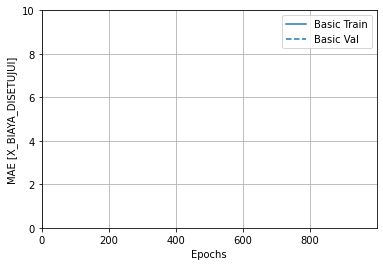

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=6)

plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [X_BIAYA_DISETUJUI]')

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:73577831333888.0000,  mae:5934543.0000,  mse:73577722281984.0000,  val_loss:72425572139008.0000,  val_mae:5905522.0000,  val_mse:72576072155136.0000,  
....................................................................................................
Epoch: 100, loss:7426268463104.0000,  mae:1376043.0000,  mse:7442785632256.0000,  val_loss:7688653635584.0000,  val_mae:1415461.1250,  val_mse:7720103575552.0000,  
....................................................................................................
Epoch: 200, loss:5684792918016.0000,  mae:612046.9375,  mse:5701532385280.0000,  val_loss:5983588319232.0000,  val_mae:629175.5000,  val_mse:6018408906752.0000,  
....................................................................................................
Epoch: 300, loss:5541110218752.0000,  mae:522041.0000,  mse:5557474820096.0000,  val_loss:5854611374080.0000,  val_mae:539073.6250,  val_mse:5890383544320.0000,  
......................................

In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} X_BIAYA_DISETUJUI".format(mae))

92/92 - 0s - loss: 11987106922496.0000 - mae: 569547.0625 - mse: 11998715707392.0000
Testing set Mean Abs Error: 569547.06 X_BIAYA_DISETUJUI


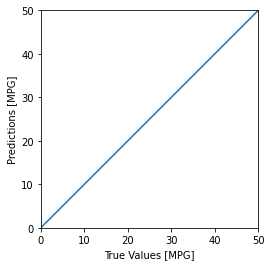

In [0]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [0]:
test_predictions

array([ 4804687.,  2674857.,  4800654., ..., 15802762., 15819184.,
       15801666.], dtype=float32)

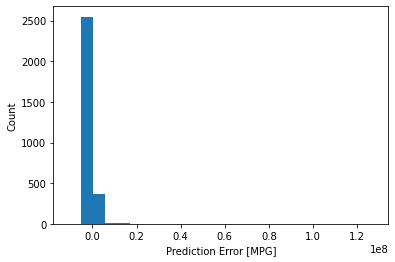

In [0]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")